In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from math import acos
from IPython.display import Image

## Исследование происходящего в статье 

Measuring Grain Junction Angles in Discretized Microstructures
Michael Chandross, Elizabeth A. Holm


In [2]:
def draw_line(point, draw=True, intercept=False):
    n = point.shape[0]
    point = point.transpose()
    if not intercept:
        k = sum(map(lambda x: x**2, point[0]))
        f = sum(point[0])
        c = sum(map(lambda x: x[0]*x[1], zip(point[0], point[1])))
        d = sum(point[1])
        A = np.array([[k, n], [f, n]])
        b = np.array([[c], [d]])
    
        

        k_1, k_2 = np.linalg.solve(A, b)
        k_1 = float(k_1)
        k_2 = float(k_2)
    
        x = np.array([point[0][0], point[0][-1]])
        print(x)
        if draw:
            plt.plot(point[0], point[1], 'bo')
            def line(x, k_1, k_2):
                return k_1*x + k_2
            plt.plot(x, line(x, k_1, k_2))
        return k_1, k_2
    else:
        c = sum(map(lambda x: x[0]*x[1], zip(point[0], point[1])))
        f = sum(point[0]**2)
       
        k_1 = c/f
        x = np.array([point[0][0], point[0][-1]])
        if draw:
            plt.plot(point[0], point[1], 'bo')
            def line(x, k_1):
                return k_1*x
            plt.plot(x, line(x, k_1))
        return k_1

Коэффициент корреляции Пирсона

$ r = \dfrac{\sum_{i=1}^n (x_i - x)(y_i - y)}{\sqrt {\sum_{i=1}^n {(x_i - x)}^2} \sqrt{\sum_{i=1}^n {(y_i - y)^2}}}$

In [3]:
def find_n(point_1, draw=True):
    amount_points = [x for x in range(3, len(point_1))]
    cor_coef = []
    for n in range(3, len(point_1)):
        point = point_1[:n].transpose()
        x_mean = point[0].mean()
        y_mean = point[1].mean()
        new_x = point[0] - x_mean
        new_y = point[1] - y_mean

        c = sum(map(lambda x: x[0]*x[1] , zip(new_x, new_y)))
        d = (sum(map(lambda x: x**2, new_x)))**(1/2)
        f = (sum(map(lambda x: x**2, new_y)))**(1/2)

        cor_coef.append(c/d/f)
    cor_coef = abs(np.array(cor_coef))
    if draw:
        plt.plot(amount_points, cor_coef, 'bo')
        plt.plot(amount_points, cor_coef)
    print('Точные значения модулей коэффициентов корреляции:\n', cor_coef)
    print('Лучшее n: ', amount_points[np.argmax(abs(cor_coef))])

In [4]:
def count_angle(point_1, point_2, draw=True):
    k1, b1 = draw_line(point_1, draw=draw)
    k2, b2 = draw_line(point_2, draw=draw)
    
    x1_0 = point_1.transpose()[0][0]
    x1_1 = point_1.transpose()[0][-1]
    x2_0 = point_2.transpose()[0][0]
    x2_1 = point_2.transpose()[0][-1]
    
    y1_0 = k1*x1_0 + b1
    y1_1 = k1*x1_1 + b1
    y2_0 = k2*x2_0 + b2
    y2_1 = k2*x2_1 + b2
    
    a_x = x1_1 - x1_0
    a_y = y1_1 - y1_0
    b_x = x2_1 - x2_0
    b_y = y2_1 - y2_0
    
    cos = (a_x*b_x + a_y*b_y)/((a_x**2 + a_y**2)**(1/2)*(b_x**2 + b_y**2)**(1/2))
    return acos(cos)*57.2958

In [5]:
p = np.array([[14, 25],
       [15, 25],
       [16, 24],
       [16, 25],
       [17, 24],
       [17, 25],
       [18, 23],
       [18, 24],
       [18, 25],
       [19, 24],
       [19, 25],
       [20, 23],
       [20, 24],
       [20, 25],
       [21, 23],
       [21, 24],
       [21, 25],
       [22, 24],
       [22, 25],
       [23, 22],
       [23, 23],
       [23, 24],
       [23, 25],
       [24, 23],
       [24, 24],
       [24, 25],
       [25, 23],
       [25, 24],
       [26, 23],
       [26, 24],
       [26, 25],
       [27, 23],
       [27, 24],
       [28, 23],
       [28, 24],
       [29, 22],
       [29, 23],
       [29, 24],
       [30, 22],
       [30, 23],
       [30, 24],
       [31, 22],
       [31, 23],
       [31, 24],
       [32, 22],
       [32, 23],
       [32, 24],
       [33, 22],
       [33, 23],
       [33, 24],
       [34, 22],
       [34, 23],
       [34, 24],
       [35, 22],
       [35, 23],
       [35, 24],
       [36, 22],
       [36, 23],
       [37, 23],
       [37, 24],
       [38, 23],
       [38, 24]])

[14 38]


(0.8279777777777777, 1.561881720430109)

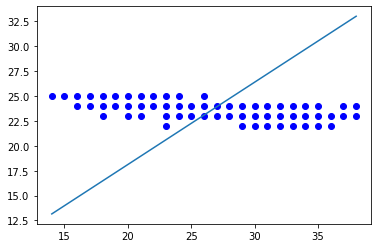

In [6]:
draw_line(p, draw=True, intercept=False)

In [12]:
model = LinearRegression()
model.fit(x_, y)

LinearRegression()

In [13]:
model.coef_

array([-0.07765607])

In [14]:
model.intercept_

25.663427561837455

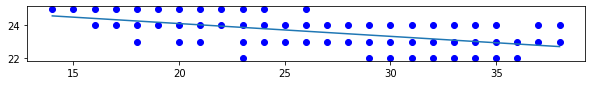

In [15]:
plt.figure(figsize=(10, 1))
plt.plot(x, y, 'bo')
def line(x):
    return -0.07765607*x + 25.663427561837455
plt.plot(x, line(x))

In [17]:
second = np.array([[15, 29],
       [16, 31],
       [17, 32],
       [18, 33],
       [18, 34],
       [19, 34],
       [19, 35],
       [20, 36],
       [20, 37],
       [21, 37],
       [22, 37],
       [23, 39],
       [23, 40],
       [26, 42]])

In [19]:
def return_koef(p):
    x = p[:, 0]
    y = p[:, 1]

    x_ = []
    for i in range(len(x)):
        x_.append([x[i]])

    model = LinearRegression()
    model.fit(x_, y)
    return model.coef_[0], model.intercept_

In [20]:
return_koef(second)

(1.168376584188292, 12.311406155703082)

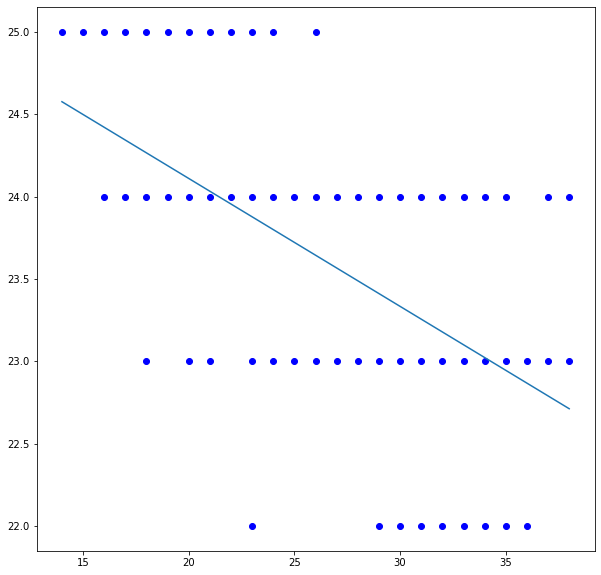

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'bo')
def line(x):
    return model.coef_[0]*x + model.intercept_
plt.plot(x, line(x))

[15 26]


(1.7767756482525365, 0.27379610243195573)

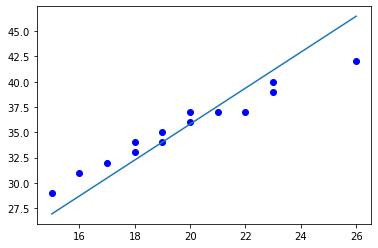

In [24]:
draw_line(second, draw=True, intercept=False)

## Как в статье

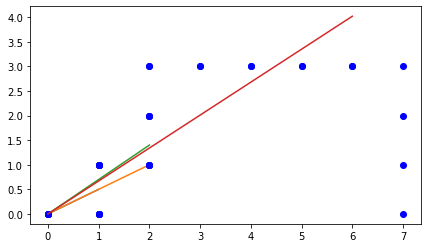

In [25]:
p = np.array([[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [7, 2], [7, 1], [7, 0]])
plt.figure(figsize=(7, 4))
plt.plot(p.transpose()[0], p.transpose()[1], 'bo')
for n in [3, 4, 5, 10]:
    draw_line(p[:n], draw=True, intercept=True)

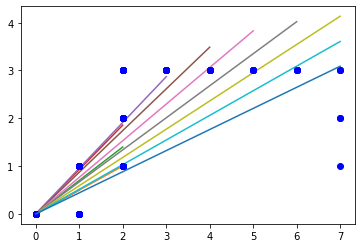

In [26]:
for n in range(3, len(p)):
    draw_line(p[:n], draw=True, intercept=True)

[0 2]
[0 2]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 7]
[0 7]
[0 7]


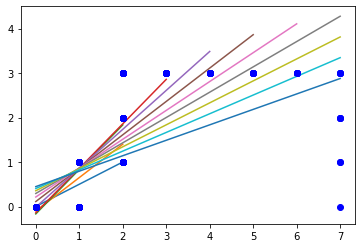

In [27]:
for n in range(3, len(p)):
    draw_line(p[:n+1])

Точные значения модулей коэффициентов корреляции:
 [0.5        0.70710678 0.78571429 0.76827333 0.84366149 0.84697247
 0.82575102 0.80102677 0.77781746 0.683947   0.51543056]
Лучшее n:  8


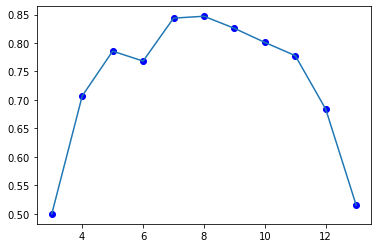

In [28]:
find_n(p)

## Мои примеры

In [29]:
point_1 = np.array([[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [2, 3], [2, 4]])
point_2 = np.array([[0, 0], [-1, 0], [-1, 1], [-2, 1], [-3, 1], [-3, 2], [-4, 2], [-4, 3], [-5, 3]])

Сначала посчитаем угол не подбирая $n$, а просто взяв все:

[0 2]
[ 0 -5]


89.76327402421173

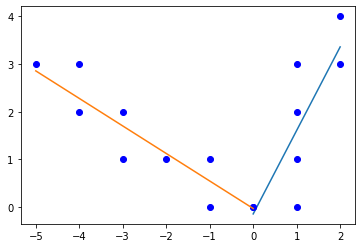

In [30]:
count_angle(point_1, point_2)

А теперь как советуют авторы статьи, подберём n.

Точные значения модулей коэффициентов корреляции:
 [0.5        0.52223297 0.51449576 0.6882472 ]
Лучшее n:  6


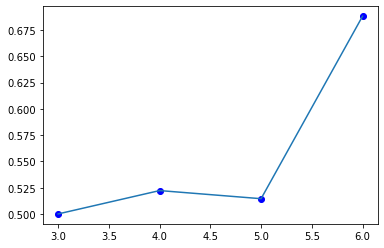

In [31]:
find_n(point_1)

Точные значения модулей коэффициентов корреляции:
 [0.5        0.70710678 0.72057669 0.80439967 0.8660254  0.8811039 ]
Лучшее n:  8


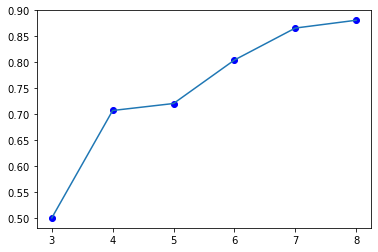

In [32]:
find_n(point_2)

И посмотрим теперь угол

[0 2]
[ 0 -4]


94.11226249587918

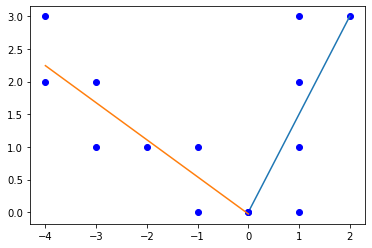

In [33]:
count_angle(point_1[:6], point_2[:8])

## Другой пример

In [34]:
p_1 = np.array([[0, 0], [1, 0], [1, 2], [2, 2], [2, 3], [4, 3], [4, 4], [7, 4], [7, 5]])
p_2 = np.array([[ 0,  0], [-1,  0], [-1,  1], [-3,  1], [-3,  2], [-4,  2], [-4,  3], [-6,  3], [-6,  4], [-7,  4], [-7,  5]])

[0 7]
[ 0 -7]


113.24395993564698

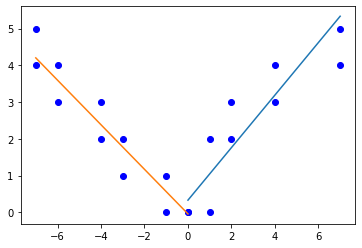

In [35]:
count_angle(p_1, p_2)

Точные значения модулей коэффициентов корреляции:
 [0.5        0.70710678 0.80178373 0.78571429 0.85714286 0.82813878]
Лучшее n:  7


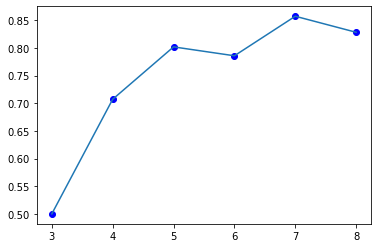

In [36]:
find_n(p_1)

Точные значения модулей коэффициентов корреляции:
 [0.5        0.6882472  0.80178373 0.8660254  0.88070485 0.90453403
 0.92767731 0.94397516]
Лучшее n:  10


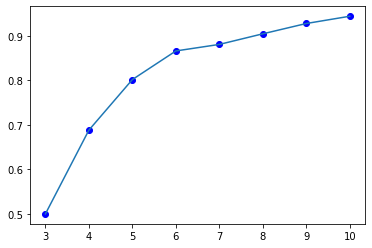

In [37]:
find_n(p_2)

[0 4]
[ 0 -7]


107.13949533704283

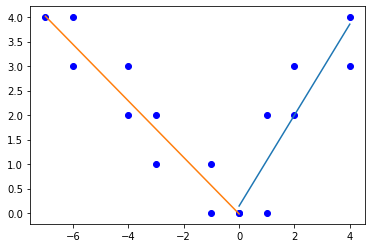

In [38]:
count_angle(p_1[:7], p_2[:10])